<a href="https://colab.research.google.com/github/alexandreleitetrevisani/DATA_SCIENCE_MACHINE_LEARNING/blob/master/IrisDataSet_MLClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get -qq install -y turicreate

E: Unable to locate package turicreate


In [2]:
!pip install -q turicreate

     |████████████████████████████████| 91.8MB 59kB/s 
     |████████████████████████████████| 3.4MB 46.3MB/s 
     |████████████████████████████████| 327kB 49.3MB/s 
     |████████████████████████████████| 86.3MB 48kB/s 
     |████████████████████████████████| 3.8MB 43.4MB/s 
     |████████████████████████████████| 450kB 49.7MB/s 
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.


In [0]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import os
import turicreate as tc

In [4]:
print(' Machine Learning and Data Science')
print(os.getcwd())
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('The INPUT DataFile: ', filename)

 Machine Learning and Data Science
/content
The INPUT DataFile:  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [5]:
print(filename)
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

dataset = pd.read_csv(filename, names=col_names)

print(dataset.shape)
print(dataset.columns)
print(dataset.head())
print(dataset.tail())

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')
   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
     sepal_length  sepal_width  petal_length  petal_width           class
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0         

In [6]:
cols1 = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

print(dataset[cols1].shape)

print(dataset[cols1].head(5))

print(dataset[cols1].describe())

print(dataset.groupby('class').size())

(150, 4)
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64



box and whisker plots


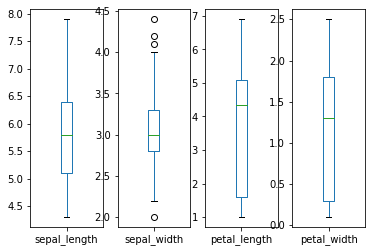


histograms


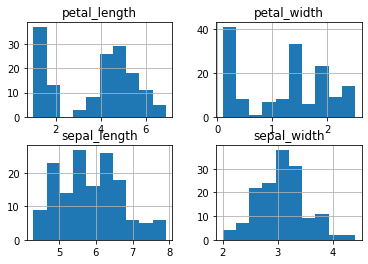


scatter plot matrix


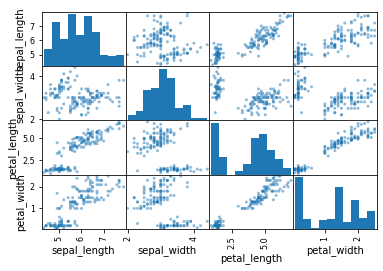

In [7]:
print()
print('box and whisker plots')
dataset[cols1].plot(kind='box', subplots=True, layout=(1, 4), sharex=False, sharey=False)
pyplot.show()

print()
print('histograms')
dataset[cols1].hist()
pyplot.show()

print()
print('scatter plot matrix')
scatter_matrix(dataset[cols1])
pyplot.show()

In [8]:
dataset = tc.SFrame(dataset)

train_Data, test_Data = dataset.random_split(0.67)

print('Train Data:: '); print(train_Data.shape); print(train_Data.head())
print('Test Data :: '); print(test_Data.shape); print(test_Data.head())

Train Data:: 
(111, 5)
+--------------+-------------+--------------+-------------+-------------+
| sepal_length | sepal_width | petal_length | petal_width |    class    |
+--------------+-------------+--------------+-------------+-------------+
|     5.1      |     3.5     |     1.4      |     0.2     | Iris-setosa |
|     4.6      |     3.1     |     1.5      |     0.2     | Iris-setosa |
|     5.4      |     3.9     |     1.7      |     0.4     | Iris-setosa |
|     5.0      |     3.4     |     1.5      |     0.2     | Iris-setosa |
|     4.4      |     2.9     |     1.4      |     0.2     | Iris-setosa |
|     4.9      |     3.1     |     1.5      |     0.1     | Iris-setosa |
|     5.4      |     3.7     |     1.5      |     0.2     | Iris-setosa |
|     4.8      |     3.4     |     1.6      |     0.2     | Iris-setosa |
|     5.7      |     4.4     |     1.5      |     0.4     | Iris-setosa |
|     5.4      |     3.9     |     1.3      |     0.4     | Iris-setosa |
+--------------

In [9]:
model_lc = tc.logistic_classifier.create(train_Data, target= 'class', features=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
print(model_lc)

predictions = model_lc.classify(test_Data)
print('PREDICTIONS: \n', predictions)

results_lc = model_lc.evaluate(test_Data)
print('EVALUATION: \n', results_lc)

print('\nAccuracy: ', results_lc['accuracy'])


PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 105

Number of classes           : 3

Number of feature columns   : 4

Number of unpacked features : 4

Number of coefficients      : 10

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 1.000778     | 0.847619          | 1.000000            |

| 2         | 3        | 1.001561     | 0.942857          | 1.000000            |

| 3         | 4        | 1.002053     | 0.961905          | 1.000000            |

| 4         | 5        | 1.002587     | 0.961905          | 1.000000            |

| 5         | 6        | 1.003080     | 0.961905          | 1.000000            |

| 6         | 7        | 1.003555     | 0.961905          | 1.000000            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 10
Number of examples             : 105
Number of classes              : 3
Number of feature columns      : 4
Number of unpacked features    : 4

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 6
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 1.0038

Settings
--------
Log-likelihood                 : 9.4364

Highest Positive Coefficients
-----------------------------
petal_width                    : 10.8788
petal_width                    : 3.9169
petal_length                   : 3.3612
petal_length                   : 1.132
sepal_length                   : 0.4496

Lowest Negative Coefficients
----------------------------
(intercept)                    : -23.2726
(intercept

In [10]:
model_bt = tc.boosted_trees_classifier.create(train_Data, target='class', features=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
print(model_bt)

predictions = model_bt.classify(test_Data)
print('PREDICTIONS: \n', predictions)

results_bt = model_bt.evaluate(test_Data)
print('EVALUATION: \n', results_bt)

print('\nAccuracy: ', results_bt['accuracy'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 105

Number of classes           : 3

Number of feature columns   : 4

Number of unpacked features : 4

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.007260     | 1.000000          | 1.000000            | 0.731443          | 0.721435            |

| 2         | 0.012385     | 1.000000          | 1.000000            | 0.515340          | 0.501587            |

| 3         | 0.018750     | 1.000000          | 1.000000            | 0.374069          | 0.359121            |

| 4         | 0.023343     | 1.000000          | 1.000000            | 0.277035          | 0.262033            |

| 5         | 0.028881     | 1.000000          | 1.000000            | 0.208404          | 0.193923            |

| 10        | 0.044942     | 1.000000          | 1.000000            | 0.061933          | 0.051369            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Class                          : BoostedTreesClassifier

Schema
------
Number of examples             : 105
Number of feature columns      : 4
Number of unpacked features    : 4
Number of classes              : 3

Settings
--------
Number of trees                : 30
Max tree depth                 : 6
Training time (sec)            : 0.0483
Training accuracy              : 1.0
Validation accuracy            : 1.0
Training log_loss              : 0.0619
Validation log_loss            : 0.0514
Training auc                   : 1.0
Validation auc                 : 1.0

PREDICTIONS: 
 +-------------+--------------------+
|    class    |    probability     |
+-------------+--------------------+
| Iris-setosa | 0.9488701224327087 |
| Iris-setosa | 0.9488701224327087 |
| Iris-setosa | 0.9488701224327087 |
| Iris-setosa | 0.9488701224327087 |
| Iris-setosa | 0.9488701224327087 |
| Iris-setosa | 0.9488701224327087 |
| Iris-setosa | 0.9488701224327087 |
| Iris-setosa | 0.9488701224327087 |
| Iris

In [11]:
model_dt = tc.decision_tree_classifier.create(train_Data, target='class', features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
print(model_dt)

predictions = model_dt.classify(test_Data)
print('PREDICTIONS: \n', predictions)

results_dt = model_dt.evaluate(test_Data)
print('EVALUATION: \n', results_dt)

print('\nAccuracy: ', results_dt['accuracy'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Decision tree classifier:

--------------------------------------------------------

Number of examples          : 105

Number of classes           : 3

Number of feature columns   : 4

Number of unpacked features : 4

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.007351     | 1.000000          | 1.000000            | 0.231776          | 0.216680            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Class                          : DecisionTreeClassifier

Schema
------
Number of examples             : 105
Number of feature columns      : 4
Number of unpacked features    : 4
Number of classes              : 3

Settings
--------
Number of trees                : 3
Max tree depth                 : 6
Training time (sec)            : 0.0108
Training accuracy              : 1.0
Validation accuracy            : 1.0
Training log_loss              : 0.2318
Validation log_loss            : 0.2167
Training auc                   : 1.0
Validation auc                 : 1.0

PREDICTIONS: 
 +-------------+--------------------+
|    class    |    probability     |
+-------------+--------------------+
| Iris-setosa | 0.8076522350311279 |
| Iris-setosa | 0.8076522350311279 |
| Iris-setosa | 0.8076522350311279 |
| Iris-setosa | 0.8076522350311279 |
| Iris-setosa | 0.8076522350311279 |
| Iris-setosa | 0.8076522350311279 |
| Iris-setosa | 0.8076522350311279 |
| Iris-setosa | 0.8076522350311279 |
| Iris-

In [12]:
model_nn = tc.nearest_neighbor_classifier.create(train_Data, target='class', features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
print(model_nn)

predictions = model_nn.classify(test_Data)
print('PREDICTIONS: \n', predictions)

results_nn = model_nn.evaluate(test_Data)
print('EVALUATION: \n', results_nn)

print('\nAccuracy: ', results_nn['accuracy'])

Starting ball tree nearest neighbors model training.

+------------+--------------+

| Tree level | Elapsed Time |

+------------+--------------+

| 0          | 121us        |

+------------+--------------+

Class                                : NearestNeighborClassifier

Schema
------
Number of examples                   : 111
Number of feature columns            : 4
Number of unpacked features          : 4
Number of distance components        : 1
Number of classes                    : 3

Training Summary
----------------
Training time (seconds)              : 0.4869



+--------------+-------------+--------------+

| Query points | % Complete. | Elapsed Time |

+--------------+-------------+--------------+

| 1            | 2.5         | 175us        |

| Done         |             | 636us        |

+--------------+-------------+--------------+

PREDICTIONS: 
 +-------------+-------------+
|    class    | probability |
+-------------+-------------+
| Iris-setosa |     1.0     |
| Iris-setosa |     1.0     |
| Iris-setosa |     1.0     |
| Iris-setosa |     1.0     |
| Iris-setosa |     1.0     |
| Iris-setosa |     1.0     |
| Iris-setosa |     1.0     |
| Iris-setosa |     1.0     |
| Iris-setosa |     1.0     |
| Iris-setosa |     1.0     |
+-------------+-------------+
[39 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


+--------------+-------------+--------------+

| Query points | % Complete. | Elapsed Time |

+--------------+-------------+--------------+

| 1            | 2.5         | 143us        |

| Done         |             | 741us        |

+--------------+-------------+--------------+

+--------------+-------------+--------------+

| Query points | % Complete. | Elapsed Time |

+--------------+-------------+--------------+

| 1            | 2.5         | 443us        |

| Done         |             | 1.264ms      |

+--------------+-------------+--------------+

EVALUATION: 
 {'accuracy': 0.9743589743589743, 'confusion_matrix': Columns:
	target_label	str
	predicted_label	str
	count	int

Rows: 4

Data:
+-----------------+-----------------+-------+
|   target_label  | predicted_label | count |
+-----------------+-----------------+-------+
|   Iris-setosa   |   Iris-setosa   |   13  |
| Iris-versicolor | Iris-versicolor |   12  |
|  Iris-virginica |  Iris-virginica |   13  |
|  Iris-virginica | Iris-versicolor |   1   |
+-----------------+-----------------+-------+
[4 rows x 3 columns]
}

Accuracy:  0.9743589743589743


In [13]:
model_rf = tc.random_forest_classifier.create(train_Data, target='class', features=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
print(model_rf)

predictions = model_rf.classify(test_Data)
print('PREDICTIONS: \n', predictions)

results_rf = model_rf.evaluate(test_Data)
print('EVALUATION: \n', results_rf)

print('\nAccuracy: ', results_rf['accuracy'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest classifier:

--------------------------------------------------------

Number of examples          : 105

Number of classes           : 3

Number of feature columns   : 4

Number of unpacked features : 4

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.013719     | 0.990476          | 1.000000            | 0.255393          | 0.219127            |

| 2         | 0.018316     | 0.980952          | 1.000000            | 0.256954          | 0.222922            |

| 3         | 0.023467     | 0.971429          | 1.000000            | 0.258795          | 0.222276            |

| 4         | 0.039305     | 1.000000          | 1.000000            | 0.251693          | 0.221268            |

| 5         | 0.044188     | 0.980952          | 1.000000            | 0.253413          | 0.221674            |

| 10        | 0.057090     | 1.000000          | 1.000000            | 0.252311          | 0.222781            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Class                          : RandomForestClassifier

Schema
------
Number of examples             : 105
Number of feature columns      : 4
Number of unpacked features    : 4
Number of classes              : 3

Settings
--------
Number of trees                : 30
Max tree depth                 : 6
Training time (sec)            : 0.0575
Training accuracy              : 1.0
Validation accuracy            : 1.0
Training log_loss              : 0.2523
Validation log_loss            : 0.2228
Training auc                   : 0.9999
Validation auc                 : 1.0

PREDICTIONS: 
 +-------------+--------------------+
|    class    |    probability     |
+-------------+--------------------+
| Iris-setosa | 0.8028064370155334 |
| Iris-setosa | 0.8028064370155334 |
| Iris-setosa | 0.8028064370155334 |
| Iris-setosa | 0.8028064370155334 |
| Iris-setosa | 0.8028064370155334 |
| Iris-setosa | 0.8028064370155334 |
| Iris-setosa | 0.8028064370155334 |
| Iris-setosa | 0.8028064370155334 |
| I

In [14]:
model = tc.classifier.create(train_Data, target='class', features=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

predictions = model.classify(test_Data)
print(predictions)

results = model.evaluate(test_Data)
print(results)

print(); print(results['accuracy'])
print(); print(results['confusion_matrix'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 105

Number of classes           : 3

Number of feature columns   : 4

Number of unpacked features : 4

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.006411     | 1.000000          | 0.833333            | 0.733064          | 0.843477            |

| 2         | 0.010334     | 1.000000          | 0.833333            | 0.516389          | 0.697912            |

| 3         | 0.013373     | 1.000000          | 0.833333            | 0.373973          | 0.619616            |

| 4         | 0.017070     | 1.000000          | 0.833333            | 0.276203          | 0.580505            |

| 5         | 0.021204     | 1.000000          | 0.833333            | 0.207668          | 0.566019            |

| 10        | 0.033934     | 1.000000          | 0.833333            | 0.060600          | 0.645133            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 105

Number of classes           : 3

Number of feature columns   : 4

Number of unpacked features : 4

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.003354     | 0.980952          | 0.833333            | 0.252647          | 0.564715            |

| 2         | 0.008619     | 0.990476          | 0.833333            | 0.244267          | 0.564994            |

| 3         | 0.012402     | 0.990476          | 0.833333            | 0.243050          | 0.587690            |

| 4         | 0.015195     | 0.990476          | 0.833333            | 0.248292          | 0.609132            |

| 5         | 0.018753     | 0.990476          | 0.833333            | 0.248868          | 0.609256            |

| 10        | 0.036968     | 0.990476          | 0.833333            | 0.251957          | 0.600935            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 105

Number of classes           : 3

Number of feature columns   : 4

Number of unpacked features : 4

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.007126     | 1.000000          | 0.833333            | 0.232417          | 0.586118            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 105

Number of classes           : 3

Number of feature columns   : 4

Number of unpacked features : 4

Number of coefficients      : 10

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.009896     | 0.866667          | 0.333333            |

| 2         | 3        | 0.012797     | 0.933333          | 0.333333            |

| 3         | 4        | 0.016237     | 0.980952          | 0.833333            |

| 4         | 5        | 0.018909     | 0.971429          | 0.833333            |

| 5         | 6        | 0.022257     | 0.971429          | 0.833333            |

| 6         | 7        | 0.024501     | 0.971429          | 0.833333            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.8333333333333334
PROGRESS: RandomForestClassifier          : 0.8333333333333334
PROGRESS: DecisionTreeClassifier          : 0.8333333333333334
PROGRESS: LogisticClassifier              : 0.8333333333333334
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.
+-------------+--------------------+
|    class    |    probability     |
+-------------+--------------------+
| Iris-setosa | 0.9489607214927673 |
| Iris-setosa | 0.9489607214927673 |
| Iris-setosa | 0.9489607214927673 |
| Iris-setosa | 0.9489607214927673 |
| Iris-setosa | 0.9489607214927673 |
| Iris-setosa | 0.9489607214927673 |
| Iris-setosa | 0.9489607214927673 |
| Iris-setosa | 0.9489607214927673 |
| Iris-setosa | 0.9489607214927673 |
| Iris-setosa | 0.9489607214927673 |
+-------------+----

In [15]:
print('\nOverall Accuracy of the trained models: \n')
print('Logistic Classifier: ', results_lc['accuracy'])
print('BoostedTree_Classifier: ', results_bt['accuracy'])
print('DecisionTree_Classifier: ', results_dt['accuracy'])
print('NearestNeibourgh_Classifier: ', results_nn['accuracy'])
print('RandomForest_Classifier: ', results_rf['accuracy'])
print('Automated_Classifier: ', results['accuracy'])




Overall Accuracy of the trained models: 

Logistic Classifier:  0.9487179487179487
BoostedTree_Classifier:  0.8974358974358975
DecisionTree_Classifier:  0.8974358974358975
NearestNeibourgh_Classifier:  0.9743589743589743
RandomForest_Classifier:  0.8974358974358975
Automated_Classifier:  0.8461538461538461
